In [1]:
using LinearAlgebra
using SparseArrays
using Plots
using Random
using MatrixMarket

In [2]:
file_name = "Trefethen_150/Trefethen_150.mtx"
# The entries are zero everywhere except for the prime numbers
# 2, 3, 5, 7, ..., 863 along the main diagonal.
# Then, we add the number 1 in all the positions A[i,j] with
# |i-j| = 1, 2, 4, 8, ..., 128.

# Load the matrix using the matrix market format (this is an optional step).
# Information data for the matrix
@show MatrixMarket.mmread(file_name,true)
rows, cols, entries, mat_format, field, symm = MatrixMarket.mmread(file_name,true)

println("Number of rows    = ", rows)
println("Number of columns = ", cols)
println("Number of entries = ", entries)

# Read the matrix data
Amm = MatrixMarket.mmread(file_name)

# Keep only the lower triangular part
Lmm = tril(Amm)

MatrixMarket.mmread(file_name, true) = (150, 150, 1095, "coordinate", "integer", "symmetric")
Number of rows    = 150
Number of columns = 150
Number of entries = 1095


150×150 SparseMatrixCSC{Int64,Int64} with 1095 stored entries:
  [1  ,   1]  =  2
  [2  ,   1]  =  1
  [3  ,   1]  =  1
  [5  ,   1]  =  1
  [9  ,   1]  =  1
  [17 ,   1]  =  1
  [33 ,   1]  =  1
  [65 ,   1]  =  1
  [129,   1]  =  1
  [2  ,   2]  =  3
  [3  ,   2]  =  1
  [4  ,   2]  =  1
  ⋮
  [147, 146]  =  1
  [148, 146]  =  1
  [150, 146]  =  1
  [147, 147]  =  853
  [148, 147]  =  1
  [149, 147]  =  1
  [148, 148]  =  857
  [149, 148]  =  1
  [150, 148]  =  1
  [149, 149]  =  859
  [150, 149]  =  1
  [150, 150]  =  863

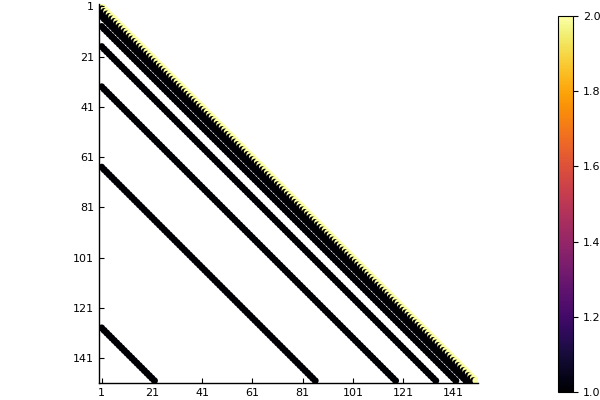

In [3]:
# Plot the matrix
pyplot()
n = Lmm.m # Size of matrix
plot(spy(Lmm), xaxis=((0,n+1), 1:20:n), yaxis=((0,n+1), 1:20:n), 
    markersize = 5, clims = (1,2))

In [4]:
include("Sparse.jl")
;

In [5]:
L = SparseMatrixCSR(Lmm);

# Matrix-vector product using the CSR format
Random.seed!(2018)
b = Float64[ rand(-9:9) for _=1:L.n ]
b = L*b

x = Vector{Float64}(undef,L.m)
# Solving: L x = b
# L is lower triangular
for i=1:L.m
    x[i] = b[i]
    for k=L.rowptr[i]:L.rowptr[i+1]-2
        x[i] -= L.nzval[k] * x[L.colval[k]]
    end
    x[i] /= L.nzval[L.rowptr[i+1]-1]
end    

println("Error should be equal to 0: ", norm(b - L * x))
norm(b - L * x) == 0 ? "PASS" : "FAIL"

Error should be equal to 0: 0.0


"PASS"